In [1]:
"""
tune_theme_estimators

The notebook is used to tune the hyperparameters in Naiva Bayes estimaters for the theme classifications
"""


# for jupyter notebook
from pathlib import Path
import sys

sys.path.insert(0, str(Path().resolve().parents[0].parents[0]))

from src.data_transformation.utils import *
from src.data_transformation.theme_classification import *

## Tune Event: penalty

Best parameter settings:
- min_df: 2
- max_df: 1000
- alpha: 0.1
- t: none
- s: 1000

In [ ]:
#-----------------------1. check WORD CLOUD -------------------
print('prepare data source[content, theme]...')

df_event_penalty = pd.read_excel(os.path.join(sub_event_path, '12_event_penalty.xlsx'))

ds_train, ds_unseen, df_train, df_test = prepare_penalty_ds(df_event_penalty)

#show_wordcloud_for_event(ds_train, 'Penalty ')

In [ ]:
#-----------------------2. Tuning: GET the best Parameter values-------------------
# parameter options
s_count_l = [100, 700, 1000]
min_df_l = [3, 5]
max_df_l = [100, 1000]
alpha_l = [0.0001, 0.01, 0.5]
t_l = []

tune_hyperparameters(df_train, t_l, min_df_l, max_df_l, alpha_l, s_count_l)

In [ ]:
#-----------------------3. get generalization performance-------------------
generalization_performance(df_train, df_test, 0, 2, 1000, 0.1, 1000)

In [ ]:
# save model
save_model(ds_train, 'penalty_model.pickle', 0, 2, 1000, 0.1, 1000)
#df_unseen = predict(ds_train, ds_unseen, 'penalty_model.pickle')
#save_event_with_theme(df_event_penalty, ds_train, df_unseen, '12_event_penalty.xlsx')

## Tune Event: permit
Best parameter settings:
- min_df: 4
- max_df: 0.9
- alpha: 0.05
- t: 0.6

- acc 94%/98.77%

prepare data source[content, theme]...


extract theme: 100%|████████████████████████████████████████████████████████| 765607/765607 [00:41<00:00, 18248.12it/s]
connect content: 765607it [01:41, 7571.49it/s] 


765607 records totally. 74093 records have no themes
theme distribution


,theme
Administration for Market Regulation,311093
Agriculture and Rural Areas,9793
Business and Commerce,9564
Development and Reform,7744
Ecology and Environment,42653
Education science culture,8018
Financial Supervision,9132
Health,7352
Housing and Urban and Rural Construction,85673
Human Resources and Social Security,18154


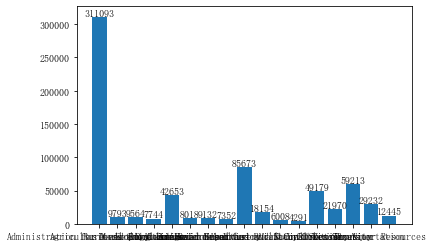

cut content:   0%|                                                                          | 0/765607 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\f-li\AppData\Local\Temp\jieba.cache
Loading model cost 0.922 seconds.
Prefix dict has been built successfully.
cut content: 100%|███████████████████████████████████████████████████████████| 765607/765607 [08:33<00:00, 1492.21it/s]


records without theme: 74093; records with theme: 691514
training set after removing the records with empty content: 686364


In [2]:
#-----------------------1. check WORD CLOUD -------------------
print('prepare data source[content, theme]...')

df_event_permit = pd.read_excel(os.path.join(sub_event_path, '11_event_permit.xlsx'))

ds_train, ds_unseen, df_train, df_test = prepare_permit_ds(df_event_permit)

#show_wordcloud_for_event(ds_train, 'Permit ')

# prepare_permit_ds() needs to much time to run
save_dir = os.path.join(data_path, 'models', 'train')

#ds_train.to_excel(os.path.join(save_dir, 'permit_ds_train.xlsx'), index=False)
#ds_unseen.to_excel(os.path.join(save_dir, 'permit_ds_unseen.xlsx'), index=False)
#df_train.to_excel(os.path.join(save_dir, 'permit_df_train.xlsx'), index=False)
#df_test.to_excel(os.path.join(save_dir, 'permit_df_test.xlsx'), index=False)

ds_train = pd.read_excel(os.path.join(save_dir, 'permit_ds_train.xlsx'))
ds_unseen = pd.read_excel(os.path.join(save_dir, 'permit_ds_unseen.xlsx'))
df_train = pd.read_excel(os.path.join(save_dir, 'permit_df_train.xlsx'))
df_test = pd.read_excel(os.path.join(save_dir, 'permit_df_test.xlsx'))

tune min_df...
tune max_df...
max_df=1500
encode target...
cross validation...
Balancing: Get the random 2728 records in each Theme...
generate features...
features: (46376, 4892)
fit estimator...
predict...
Balancing: Get the random 2728 records in each Theme...
generate features...
features: (46376, 4946)
fit estimator...
predict...
Balancing: Get the random 2728 records in each Theme...
generate features...
features: (46376, 4870)
fit estimator...
predict...
Balancing: Get the random 2728 records in each Theme...
generate features...
features: (46376, 4868)
fit estimator...
predict...
Balancing: Get the random 2728 records in each Theme...
generate features...
features: (46376, 4837)
fit estimator...
predict...
the records failed to predict...


,content,theme,count


prediction percentage: 1.0
Confusion Matrix:


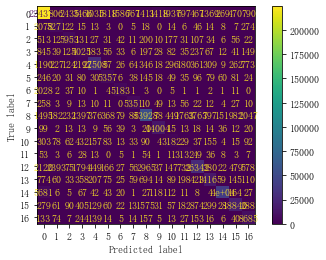

0        Administration for Market Regulation 
1                  Agriculture and Rural Areas
2                        Business and Commerce
3                       Development and Reform
4                      Ecology and Environment
5                    Education science culture
6                        Financial Supervision
7                                       Health
8     Housing and Urban and Rural Construction
9          Human Resources and Social Security
10                    Industry and Information
11                            Military Defense
12                           Natural Resources
13                             Public Security
14                                    Taxation
15                              Transportation
16                             Water Resources
dtype: object
prediction accuracy is 0.8473458862010123; precision:0.7140514836257368; recall: 0.8064525743703065; f1 score： 0.7449989438604353
max_df=2500
encode target...
cross validation...
Balancin

,content,theme,count


prediction percentage: 1.0
Confusion Matrix:


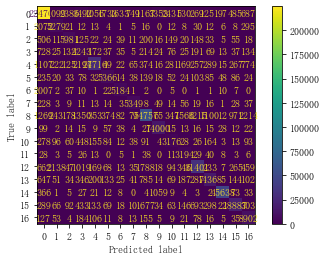

0        Administration for Market Regulation 
1                  Agriculture and Rural Areas
2                        Business and Commerce
3                       Development and Reform
4                      Ecology and Environment
5                    Education science culture
6                        Financial Supervision
7                                       Health
8     Housing and Urban and Rural Construction
9          Human Resources and Social Security
10                    Industry and Information
11                            Military Defense
12                           Natural Resources
13                             Public Security
14                                    Taxation
15                              Transportation
16                             Water Resources
dtype: object
prediction accuracy is 0.8707882664257837; precision:0.7288061105798919; recall: 0.8278727564544892; f1 score： 0.7646867104714512
The best parameter is 2500.
tune alpha...
tune threshold.

((None,
        accuracy  precision    recall  f1-score
  1500  0.847346   0.714051  0.806453  0.744999
  2500  0.870788   0.728806  0.827873  0.764687,
  None,
  None,
  None),
 (None, 2500, None, None, None))

In [10]:
#-----------------------2. Tuning: GET the best Parameter values-------------------
# parameter options
s_count_l = []
min_df_l = []
max_df_l = [1500, 2500]
alpha_l = []
t_l = []

tune_hyperparameters(df_train, t_l, min_df_l, max_df_l, alpha_l, s_count_l)

In [32]:
#-----------------------3. get generalization performance-------------------
generalization_performance(df_train, df_test, 0.75, 3, 1.0, 0.1, 1000)

generate features...
Balancing: Get the random 3410 records in each Theme...
features: (57970, 14417)
encode target...
fit estimator...
predict...
deal with unknown target...
32261 records failed to predict...
prediction coverage: 0.7649865596293517


X:\ProjectData\SCS\creditchina\src\data_transformation\theme_classification.py:712: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  le.fit(y_actual.append(y_predicted))
C:\Users\f-li\Miniconda3\envs\parsingpdf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7379892622729889 0.8534163382230301 0.6923439524967419 0.7577806780012093


In [37]:
# save model
#save_model(ds_train, 'permit_model_without_threshold.pickle', 0, 3, 1.0, 0.1, 1000)
df_unseen = predict(ds_train, ds_unseen, 'permit_model.pickle', 0.75)
save_event_with_theme(df_event_permit, ds_train, df_unseen, '11_event_permit.xlsx')

predict...
deal with unknown target...


## Tune Event: Commitment
Best parameter settings:
- min_df: 2
- max_df: 500
- alpha: 0.5
- t: 0.65 or none



In [ ]:
#-----------------------1. check WORD CLOUD -------------------
print('prepare data source[content, theme]...')

df_event_commitment = pd.read_excel(os.path.join(sub_event_path, '51_event_commitment_implementation.xlsx'))

ds_train, ds_unseen, df_train, df_test = prepare_commitment_ds(df_event_commitment)

#show_wordcloud_for_event(ds_train, 'Commit ')

In [ ]:
#-----------------------2. Tuning: GET the best Parameter values-------------------
# parameter options
s_count_l = [500, 1000]
min_df_l = [2, 7]
max_df_l = [100, 500, 1000]
alpha_l = [0.0001, 0.01, 0.5]
t_l = [0, 0.5]

tune_hyperparameters(df_train, t_l, min_df_l, max_df_l, alpha_l, s_count_l)

In [ ]:
#-----------------------3. get generalization performance-------------------
generalization_performance(df_train, df_test, 0, 2, 500, 0.5, 650)

In [ ]:
# with threshold
print(df_test.shape)
generalization_performance(df_train, df_test, 0.65, 2, 500, 0.5, 650)

In [ ]:
# save the best model
save_model(ds_train, 'commit_model.pickle', 0.65, 2, 500, 0.5, 650)
#df_unseen = predict(ds_train, ds_unseen, 'commit_model.pickle')
#df = save_event_with_theme(df_event_commitment, ds_train, df_unseen, '51_event_commitment_implementation.xlsx')

In [ ]:
# check unknown
df.theme.value_counts()